In [1]:
import Crypto_PM as PM
import pandas_datareader as web
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns


In [2]:
start = datetime(2020,1,1)
end = datetime.today()

<AxesSubplot:xlabel='Date'>

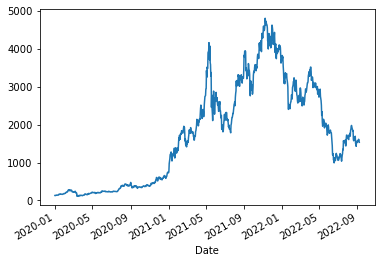

In [3]:
eth_prices = web.DataReader('ETH-USD', 'yahoo', start, end)
eth_prices['Close'].plot()

<AxesSubplot:xlabel='Date'>

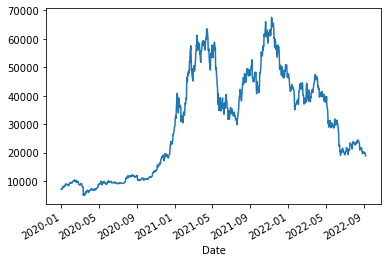

In [4]:
btc_prices = web.DataReader('BTC-USD', 'yahoo', start, end)
btc_prices['Close'].plot()

<AxesSubplot:xlabel='Date'>

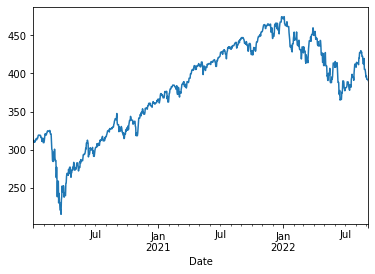

In [5]:
spy_prices = web.DataReader('SPY', 'yahoo', start, end)
spy_prices = spy_prices.resample('D').ffill() #resample to get all days instead of just trading days
spy_prices['Adj Close'].plot()

In [6]:
stable_lp = PM.lp_stable_value(pd.Series(eth_prices['Close']), 1000, 0.25)['lp_value_yield'] #create an LP position of ETH/USD

In [7]:
eth_btc_lp = PM.lp_tokens_value(pd.Series(eth_prices['Close']), pd.Series(btc_prices['Close']), 1000, 0.25)

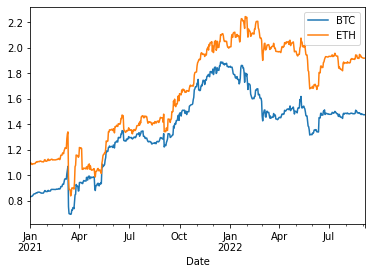

In [8]:
#rolling 12mo beta for BTC and ETH to SPY
beta_btc = btc_prices['Close'].pct_change().rolling(365).cov(spy_prices['Adj Close'].pct_change())/spy_prices['Adj Close'].pct_change().rolling(365).var()
beta_eth = eth_prices['Close'].pct_change().rolling(365).cov(spy_prices['Adj Close'].pct_change())/spy_prices['Adj Close'].pct_change().rolling(365).var()

beta_btc.dropna().plot(label='BTC')
beta_eth.dropna().plot(label='ETH')
plt.legend()

Text(0, 0.5, '$ Price')

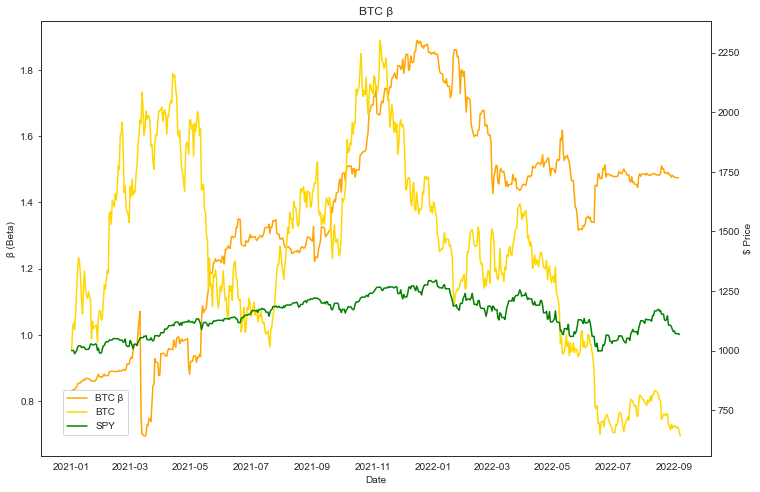

In [9]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax1 = plt.subplots()
ax1.plot(beta_btc.loc["2021-01-01"::], color='Orange', label='Bitcoin β')
ax2 = ax1.twinx()
ax2.plot(btc_prices['Close'].loc["2021-01-01"::]/btc_prices['Close'].loc["2021-01-01"::].iloc[0]*1000, color='Gold', label='BTC')
ax3 = plt.plot(spy_prices['Adj Close'].loc["2021-01-01"::]/spy_prices['Adj Close'].loc["2021-01-01"::].iloc[0]*1000, color='Green', label='SPY')
fig.legend(['BTC β', 'BTC', 'SPY'], loc='center left', bbox_to_anchor=(0.145, 0.2))
plt.title("BTC β")
ax1.set_xlabel('Date')
ax1.set_ylabel('β (Beta)')
ax2.set_ylabel('$ Price')

Text(0, 0.5, '$ Price')

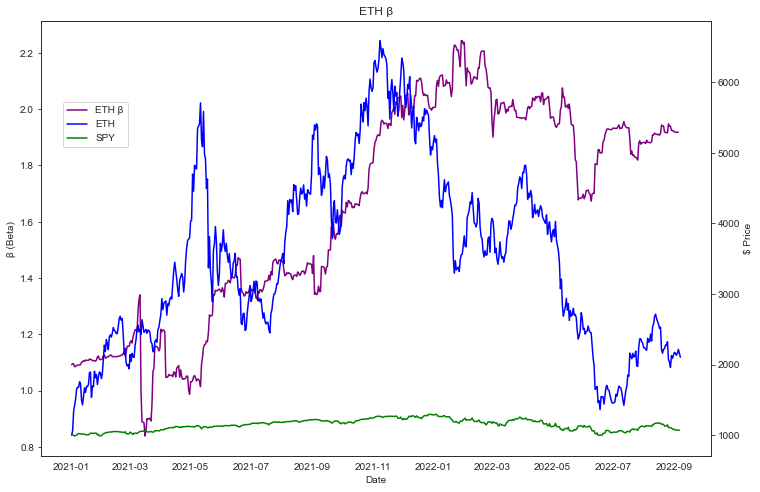

In [10]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax1 = plt.subplots()
ax1.plot(beta_eth.loc["2021-01-01"::], color='Purple', label='Ether β')
ax2 = ax1.twinx()
ax2.plot(eth_prices['Close'].loc["2021-01-01"::]/eth_prices['Close'].loc["2021-01-01"::].iloc[0]*1000, color='Blue', label='ETH')
ax3 = plt.plot(spy_prices['Adj Close'].loc["2021-01-01"::]/spy_prices['Adj Close'].loc["2021-01-01"::].iloc[0]*1000, color='Green', label='SPY')
fig.legend(['ETH β', 'ETH', 'SPY'], loc='center left', bbox_to_anchor=(0.145, 0.7))
plt.title("ETH β")
ax1.set_xlabel('Date')
ax1.set_ylabel('β (Beta)')
ax2.set_ylabel('$ Price')

In [11]:
plt.style.use('default') #resetting to default params
sns.set_style('white')

In [12]:
#finding the Jensen Alpha of holding ETH versus SPY
PM.alpha_calc(eth_prices['Close'].loc['2021-01-01'::], spy_prices['Adj Close'])

Portfolio return: 0.5545745999414569
Benchmark return: 0.039215402844514635
Porfolio Beta: 1.9355770007887934


0.4786701681189469

In [13]:
#finding the Jensen Alpha of holding BTC versus SPY
PM.alpha_calc(btc_prices['Close'].loc['2021-01-01'::], spy_prices['Adj Close'])

Portfolio return: -0.23176389824594246
Benchmark return: 0.039215402844514635
Porfolio Beta: 1.5613176634748909


-0.29299159938736663

### Measuring a hypothetical token
Creating a portfolio based on a hypothetical token with a given return and variance and comparing LP positions of that token with a USD stable

<AxesSubplot:>

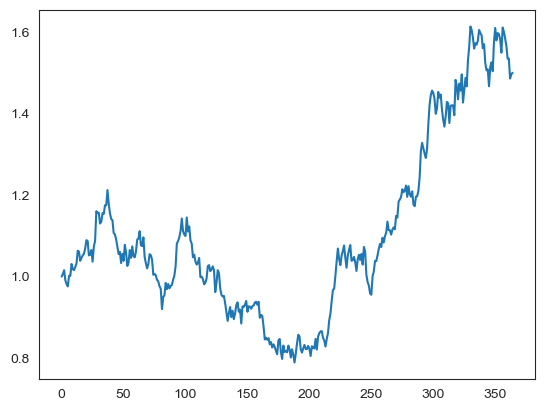

In [14]:
prices = pd.Series(PM.simple_forward_prices(1, 0.5, 0.02)) #create 365 days of prices for token with 50% return and 0.02 variance
prices.plot()

In [15]:
#create LP position of hypothetical token
stable_lp = PM.lp_stable_value(prices, 1000, 0.25)
stable_lp

,lp_value,lp_value_yield,full_hodl,diverse_hodl
0,1000.000000,1000.611539,1000.000000,1000.000000
1,1003.075443,1004.302658,1006.160344,1003.080172
2,1007.745151,1009.595109,1015.550290,1007.775145
3,995.285562,997.722420,990.593350,995.296675
4,990.722322,993.755357,981.530720,990.765360
...,...,...,...,...
360,1238.797560,1544.714868,1534.619395,1267.309698
361,1238.801660,1545.664637,1534.629552,1267.314776
362,1218.937025,1521.809420,1485.807471,1242.903735
363,1223.170933,1528.029217,1496.147132,1248.073566


In [16]:
#create portfolio with 50% LP comp from hypothetical token
portfolio = PM.token_lp_portfolio(prices, 0.5, 0.25)

In [17]:
#Sharpe ratios of token, LP position, and 50/50 portfolio
print(f"Token Sharpe Ratio: {PM.sharpe_portfolio(prices, 0.02)}")
print(f"LP Token/USD Sharpe Ratio: {PM.sharpe_portfolio(stable_lp['lp_value_yield'], 0.02)}")
print(f"50/50 Portfolio Sharpe Ratio: {PM.sharpe_portfolio(portfolio, 0.02)}")

Token Sharpe Ratio: 1.196048899301947
LP Token/USD Sharpe Ratio: 2.543174192259731
50/50 Portfolio Sharpe Ratio: 1.665087555276815


In [18]:
#Sortino ratios of token, LP position, and 50/50 portfolio
print(f"Token Sortino Ratio: {PM.sortino_portfolio(prices, 0.02)}")
print(f"LP Token/USD Sortino Ratio: {PM.sortino_portfolio(stable_lp['lp_value_yield'], 0.02)}")
print(f"50/50 Portfolio Sortino Ratio: {PM.sortino_portfolio(portfolio, 0.02)}")

Token Sortino Ratio: 1.6208017658922527
LP Token/USD Sortino Ratio: 2.787735657256146
50/50 Portfolio Sortino Ratio: 2.0907925989021456


<AxesSubplot:title={'center':'Uniswap V3 Pool Comparison of ETH/BTC\nLow Tick = 0.065, High Tick 0.081, 40% APY when in range'}, xlabel='Date'>

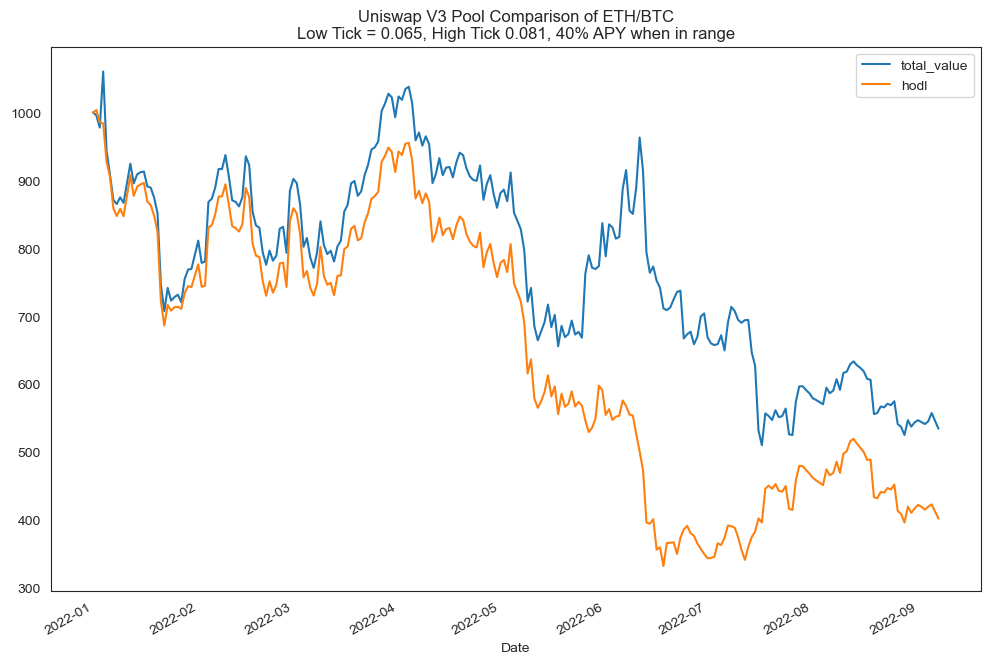

In [20]:
#uni v3 position of eth and btc
start_date = '2022-01-01'
ethbtc_univ3 = PM.uni_v3_lp(eth_prices['Close'].loc[start_date:], btc_prices['Close'].loc[start_date:], tick_l = 0.065, tick_h = 0.081, invest = 1000, apy = 0.4)
ethbtc_univ3[['total_value', 'hodl']].plot(figsize=(12,8), title='Uniswap V3 Pool Comparison of ETH/BTC\nLow Tick = 0.065, High Tick 0.081, 40% APY when in range')